In [12]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [14]:
df = pd.read_csv("sentences_with_emojis.csv")
print(df.head())

                         Sentence Emoji
0        I am feeling happy today     😊
1                I miss my family     😢
2         I am so angry right now     😡
3  Tears in my eyes from laughing     😂
4       I am shocked by this news     😱


In [24]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    return text

df["Sentence"] = df["Sentence"].apply(preprocess_text)

In [18]:
X = df["Sentence"]
y = df["Emoji"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [26]:
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


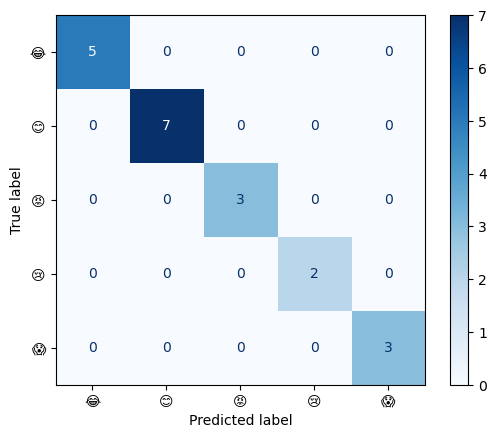

In [28]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [30]:
test_sentences = [
    "I love programming!",
    "I'm feeling sleepy",
    "That was so funny!",
    "I miss my family",
    "This is unbelievable"
]
test_sentences_clean = [preprocess_text(s) for s in test_sentences]
test_tfidf = vectorizer.transform(test_sentences_clean)
predicted_emojis = model.predict(test_tfidf)

for sent, emoji in zip(test_sentences, predicted_emojis):
    print(f"{sent} → {emoji}")

I love programming! → 😊
I'm feeling sleepy → 😊
That was so funny! → 😂
I miss my family → 😢
This is unbelievable → 😱
